머신러닝 개념
학습 방법에 따른 분류: 1)지도(컴퓨터에게 문제와 정답을 계속 넘겨서 학습시킴) 2)비지도(문제만 넘김) 3)강화
해결 문제영역에 따른 분류: 분류,회귀(수치), 군집 ... 



강화학습: 매순간 잘했다 못해다하는 보상을 주어 학습함 



Open AI GYM이라는 FW에 이미 만들어진 환경(Environment)을 사용하여 실습해 보겠습니다.   
 
첫번째 환경(Environment) 은 Frozen Lake Game 입니다.  S에서 시작,  H는(Hole) 여기에 빠지면 감점. 목표는 G(goal)에 가는 것입니다.   게임의 전체 환경을 볼 수 있다면 다음과 같습니다.   
 
 

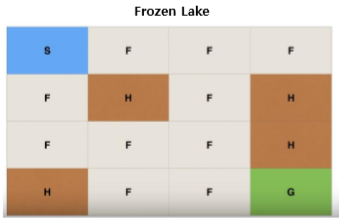

In [2]:
from IPython.display import Image
Image ("C:/Users/user/Pictures/frozen_lake.png")

Agent는 Action을 취할수 있고 이에 따라 상태를 전달받고 (state) 보상을 받기도한다(reward)


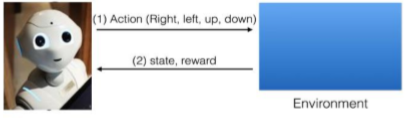

In [3]:
Image ("C:/Users/user/Pictures/reinforce1.png")

처음에는 각 테이블의 각 구간의 점수가 없기때문에 0으로 채워져있음 
→ 랜덤하게 움직임 
→ 우연히 S14에 닿아 goal 에 이르른 경우 reward를 1 받게됨(게임이 Goal에 이르르는 성공을 하였을 경우 reward를 받는 게임이므로) 
→ S14는 goal과 맞닿아있는 방향에 1을 얻게되고(reward + max Q(s,a): 다음상태의 Q테이블의 최댓값 = reward:1 + max 15(s,a):0)  
→ S10도 S14에 갈수있는 아랫쪽 방향에, S13은 오른쪽에 (게임에서 얻은 reward + 새상태의 max값) 을 얻게됨 
→ and so on..


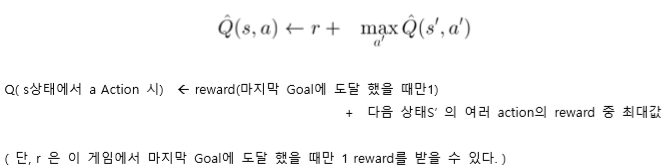

In [4]:
Image ("C:/Users/user/Pictures/frozenlake.png")

Gym 을 이용한 게임
Gym 을 이용한 게임의 기본틀


import gym
evn = gym.make (“Taxi-v1”)
observation = env.reset()

for_in range(1000):
	env.render()
	action = env.action_space.sample()


Q table만들기
Q [16,4] : 전체 배열이 16개, 각 한 칸에 4개의 점수구간이 있음 

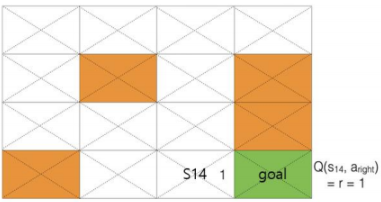

In [5]:
Image ("C:/Users/user/Pictures/action1.png")  

## Q-learning

첫번째 액션 정의 action = rargmax(Q[state, :]) cf: Q[0,:] 0번째 (start 지점, state 몇번째 상태인지 predefined number) 행의 모든 열 (start 칸의 모든 네 개의 칸)에서의 최댓값

    
이후 액션 정의 Q[state, action] = reward + np.max (Q[new_state. :]

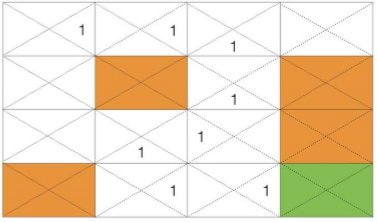

In [7]:
Image ("C:/Users/user/Pictures/action2.png")  

단점: 길이 한번 생기고 나면 그 길로만 가고 모험을 하지않는다 → 최적이 아닐 수 있음


⇒ 1) E-greedy: 10% 확률로 random, 90% 아는 길로  
2)decaying E-greedy


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random

#최대값이 모두 같을 때 random하게 return하도록 작성한 코드.
def rargmax(vector):
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

# Q를 모두 0으로 초기화.  Q[16,4]
# env.observation_space.env의 공간의 n 모든 갯수 
# env. action_space: env가 취할수있는 모든 action의 n 갯수

Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters, 게임을 총 몇 번 돌릴 것인지
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):  # 여러번 반복 학습
    state = env.reset()    # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False
 
    #TODO

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by e-greedy 
        # 현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        # 단, 알려진 길로만 가지 않기 위해서 random 값이 e보다 적은 경우는 아무렇게나 action
        # 학습 후반부로 갈 수록 e의 값은 작아져, 정해질 길로 가게 됩니다.
        #TODO
        action = rargmax (Q[state, :])

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step (action) #TODO

        # Update Q-Table with new knowledge using decay rate
        Q[state, action] = reward + np.max (Q[new_state, :])#TODO

        rAll += reward
        state = new_state
    rList.append(rAll)

    
#rList는 게임이 끝날때마다 게임에서 얻은 reward sum을 append 한 array. 이 게임의 경우 if 게임이 성공했으면 reward = 1, 게임이 성공하지못하고 중간
#에 끝난경우 0을 기록한다. --> rList에 input 값은 game 횟수와 같다. 여기서는 2000개의 값을 가진 array
    
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()

Success rate: 0.9535
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


<Figure size 640x480 with 1 Axes>